# GENERAL: TO DELETE

Found some crazy resources which will make our life much easier

> 1. [kaggle EEG Muse (meh)](https://www.kaggle.com/birdy654/eeg-brainwave-dataset-mental-state)
> 1. [Crazy code that makes literally 1000 features for you](https://github.com/jordan-bird/eeg-feature-generation)
> 1. [Explanation of features and their importance ans science and shite](https://link.springer.com/chapter/10.1007/978-3-030-29933-0_37)

-Almu

# General

## Fix Random State

In [1]:
SEED = 55;

## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as kr
import seaborn as sns
import os
#import scipy

# Importing the Raw Data

In [3]:
%%time


# Get Current Working directory and append the data relative dir
cwd = os.getcwd()
notTiredDir = cwd + r"\Data\Raw\NotTired"
tiredDir = cwd + r"\Data\Raw\Tired"

# Hold file locations
filesTired=[];
filesNotTired=[];

#Populate file location arrays
for file in os.listdir(notTiredDir):
    if file.endswith('.csv'):
        filesNotTired.append(os.path.join(notTiredDir, file))
for file in os.listdir(tiredDir):
        if file.endswith('.csv'):
            filesTired.append(os.path.join(tiredDir, file))
            
#Test reading files by changing num1
num1=6;
sample = pd.read_csv(filesNotTired[num1])
sample 

Wall time: 20 ms


,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2021-11-01 17:54:38.045,1.110457,-0.382196,0.082630,0.743808,0.455723,-0.523256,0.086015,0.487615,0.493558,...,4.134674,-5.824432,-1.510315,1.0,1.0,2.0,1.0,1.0,70.0,NaN
1,2021-11-01 17:54:39.045,0.904642,-0.382196,0.236881,0.613098,0.313527,-0.523256,0.171247,0.546970,0.538756,...,4.329071,-2.990723,-1.644897,1.0,1.0,2.0,1.0,1.0,70.0,NaN
2,2021-11-01 17:54:39.187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/jaw_clench
3,2021-11-01 17:54:40.045,0.652124,-0.382196,0.462323,0.410327,0.293693,-0.523256,0.267178,0.466408,0.343593,...,5.622559,-5.099182,-0.732727,1.0,1.0,2.0,1.0,1.0,70.0,NaN
4,2021-11-01 17:54:41.043,0.558608,-0.382196,0.502156,0.877835,0.281408,-0.523256,0.337400,0.469669,0.381862,...,4.882355,-3.536530,-1.652374,1.0,1.0,2.0,1.0,1.0,70.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2021-11-01 17:56:57.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,5.510406,-7.880554,-2.257996,1.0,1.0,4.0,2.0,1.0,70.0,NaN
157,2021-11-01 17:56:57.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
158,2021-11-01 17:56:57.852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
159,2021-11-01 17:56:58.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,4.844971,-6.190796,-2.781372,1.0,1.0,4.0,4.0,1.0,70.0,NaN


In [4]:
#Mini-Summary of Block
print(f"> {len(filesNotTired)} files were added from the NOT TIRED category")
print(f"> {len(filesTired)} files were added from the TIRED category\n")

> 22 files were added from the NOT TIRED category
> 10 files were added from the TIRED category



## Available Features

In [5]:
pd.DataFrame(sample.columns)

,0
0,TimeStamp
1,Delta_TP9
2,Delta_AF7
3,Delta_AF8
4,Delta_TP10
5,Theta_TP9
6,Theta_AF7
7,Theta_AF8
8,Theta_TP10
9,Alpha_TP9


## Raw Data Structure

In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TimeStamp        161 non-null    object 
 1   Delta_TP9        141 non-null    float64
 2   Delta_AF7        141 non-null    float64
 3   Delta_AF8        141 non-null    float64
 4   Delta_TP10       141 non-null    float64
 5   Theta_TP9        141 non-null    float64
 6   Theta_AF7        141 non-null    float64
 7   Theta_AF8        141 non-null    float64
 8   Theta_TP10       141 non-null    float64
 9   Alpha_TP9        141 non-null    float64
 10  Alpha_AF7        141 non-null    float64
 11  Alpha_AF8        141 non-null    float64
 12  Alpha_TP10       141 non-null    float64
 13  Beta_TP9         141 non-null    float64
 14  Beta_AF7         141 non-null    float64
 15  Beta_AF8         141 non-null    float64
 16  Beta_TP10        141 non-null    float64
 17  Gamma_TP9       

# Data Preprocessing

## Creating the RAW Dataset

In [7]:
%%time
## Extract rows 21-25 from all files as these are the only 5 relevent features

rowsTired=[];
for f in filesTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])
        
rowsNotTired=[];
for f in filesNotTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsNotTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])



Wall time: 3min 18s


In [45]:
data_NT = pd.DataFrame(rowsNotTired);
original_NT = data_NT.copy();
data_NT

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-01 17:27:27.362,792.967033,811.904762,769.194139,788.937729,680.549451
1,2021-11-01 17:27:28.362,751.465201,770.805861,780.879121,803.846154,799.816850
2,2021-11-01 17:27:29.362,747.435897,827.619048,793.369963,802.234432,906.190476
3,2021-11-01 17:27:30.371,838.901099,803.040293,803.443223,795.787546,817.142857
4,2021-11-01 17:27:31.366,809.890110,780.476190,798.205128,743.406593,785.311355
...,...,...,...,...,...,...
1666,2021-11-02 22:14:34.024,821.575092,778.058608,818.351648,836.080586,809.487179
1667,2021-11-02 22:14:35.026,773.626374,778.461538,813.113553,797.399267,712.783883
1668,2021-11-02 22:14:36.024,776.849817,800.219780,793.369963,803.040293,482.307692
1669,2021-11-02 22:14:37.024,812.307692,796.996337,788.937729,805.054945,712.783883


In [46]:
data_T = pd.DataFrame(rowsTired);
original_T = data_T.copy();
data_T

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-11 00:54:16.918,782.893773,767.985348,1100.805861,799.413919,732.930403
1,2021-11-11 00:54:17.318,NaN,NaN,NaN,NaN,NaN
2,2021-11-11 00:54:17.920,790.549451,887.655678,1648.791209,809.487179,734.139194
3,2021-11-11 00:54:18.686,NaN,NaN,NaN,NaN,NaN
4,2021-11-11 00:54:18.929,755.494505,0.000000,0.000000,732.124542,565.714286
...,...,...,...,...,...,...
452,2021-11-12 06:29:34.149,NaN,NaN,NaN,NaN,NaN
453,2021-11-12 06:29:34.364,845.347985,590.293040,1199.523810,852.197802,680.146520
454,2021-11-12 06:29:35.364,811.501832,514.542125,695.457875,851.794872,835.677656
455,2021-11-12 06:29:35.788,NaN,NaN,NaN,NaN,NaN


In [47]:
print(f"Not Tired Data size is: \t{data_NT.shape}", f"\nTired Data size is: \t\t{data_T.shape}")

Not Tired Data size is: 	(9685, 6) 
Tired Data size is: 		(10796, 6)


## Adding empty column 
Append an empty column in order to run the method.


In [48]:
#Conserve headers
headers = original_NT.columns.values.tolist()

#Stack ones or zeros for each class [0 = NotTired, 1 = Tired]
data_T = pd.DataFrame(np.hstack((data_T.to_numpy(),   np.zeros((data_T.shape[0], 1)) )))
data_NT= pd.DataFrame(np.hstack((data_NT.to_numpy(), np.zeros((data_NT.shape[0], 1)))))

In [49]:
#Reattach headers
data_T.columns =  np.hstack((headers, ['Empty']));
data_NT.columns = np.hstack((headers, ['Empty']));

#Check
data_NT

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT,Empty
0,2021-11-01 17:27:27.362,792.967033,811.904762,769.194139,788.937729,680.549451,0.0
1,2021-11-01 17:27:28.362,751.465201,770.805861,780.879121,803.846154,799.81685,0.0
2,2021-11-01 17:27:29.362,747.435897,827.619048,793.369963,802.234432,906.190476,0.0
3,2021-11-01 17:27:30.371,838.901099,803.040293,803.443223,795.787546,817.142857,0.0
4,2021-11-01 17:27:31.366,809.89011,780.47619,798.205128,743.406593,785.311355,0.0
...,...,...,...,...,...,...,...
9680,2021-11-02 22:14:34.024,821.575092,778.058608,818.351648,836.080586,809.487179,0.0
9681,2021-11-02 22:14:35.026,773.626374,778.461538,813.113553,797.399267,712.783883,0.0
9682,2021-11-02 22:14:36.024,776.849817,800.21978,793.369963,803.040293,482.307692,0.0
9683,2021-11-02 22:14:37.024,812.307692,796.996337,788.937729,805.054945,712.783883,0.0


## Remove Empty Rows

In [50]:
data_T = data_T.dropna()

In [51]:
data_NT = data_NT.dropna()

## Convert Datetime Column to Timestamps

In [52]:
from datetime import datetime

ind = 0;
for time in data_T.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_T.iat[ind, 0] = (tmstmp);
    ind=ind+1;
    
ind = 0;
for time in data_NT.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_NT.iat[ind, 0] = (tmstmp);
    ind=ind+1;



In [53]:
data_NT.head()

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT,Empty
0,1635812847.362,792.967033,811.904762,769.194139,788.937729,680.549451,0.0
1,1635812848.362,751.465201,770.805861,780.879121,803.846154,799.81685,0.0
2,1635812849.362,747.435897,827.619048,793.369963,802.234432,906.190476,0.0
3,1635812850.371,838.901099,803.040293,803.443223,795.787546,817.142857,0.0
4,1635812851.366,809.89011,780.47619,798.205128,743.406593,785.311355,0.0


## Save RAW Data to File

In [54]:
savelocT = cwd + r"\Data\Preprocessed\Tired.csv"
savelocNT = cwd + r"\Data\Preprocessed\NotTired.csv"

if os.path.exists(savelocT):
    os.remove(savelocT)
    
if os.path.exists(savelocNT):
    os.remove(savelocNT)

data_T.to_csv(savelocT,  mode='w', index = False)
data_NT.to_csv(savelocNT,mode='w', index = False)


from eegFG import EEG_feature_extraction as FG

x, y = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                         nsamples=50, 
                                         period=10, 
                                         remove_redundant=True, 
                                         cols_to_ignore=None)

#state=data_NT.iloc[:,-1]

## EEG Feature Generation

In [55]:
from eegFG import EEG_feature_extraction as FG

Nsamp = 50;
Perio = 6;

xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                         nsamples=Nsamp, 
                                         period=Perio,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.05,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xT.shape

C:\Users\Al\anaconda3\lib\site-packages\scipy\linalg\_matfuncs_inv_ssq.py:827: LogmExactlySingularWarning: The logm input matrix is exactly singular.
  warnings.warn(exact_singularity_msg, LogmExactlySingularWarning)


(119, 984)

In [56]:
xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
                                         nsamples=Nsamp, 
                                         period=5,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.06,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xNT.shape

(219, 984)

```python

%%time

from importlib import reload

flaggity=False

tmp_results=[]
thresh = 95;
for ns in range(50,256,1):
    if (flaggity==True):
        break;
    for p in range(3,8):
        
        try:
            reload(FG);
            xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                 nsamples=ns, 
                                 period=p,
                                 #state=data_NT.iloc[:,-1],
                                 slide_percent=0.01,
                                 remove_redundant=False, 
                                 cols_to_ignore=None)
            
            xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
                                 nsamples=ns, 
                                 period=p,
                                 #state=data_NT.iloc[:,-1],
                                 slide_percent=0.01,
                                 remove_redundant=False, 
                                 cols_to_ignore=None)
        
        except (UnboundLocalError):
            continue;
            
        
        if (xNT.shape[1] == xT.shape[1]):
            print('Cols match!', xT.shape, xNT.shape)
            if (xNT.shape[0] >= thresh and xT.shape[0] >= thresh):
                print('Thresh met.')
                tmp_results.append((ns,p,xNT.shape[0],xT.shape[0],xNT.shape[1]))
                flaggity=True;
                break;
                
                
tmp_results

```

In [57]:
X_NT = pd.DataFrame(xNT)
X_NT.columns = np.hstack((['TimeStamp'], yNT))
X_NT.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,...,freq_156_5,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.0,219.000000,219.000000,219.000000,219.000000,...,219.0,219.0,219.0,219.0,219.0,219.0,219.0,219.0,219.0,219.0
mean,779.105307,790.250350,793.258774,774.799042,826.072764,0.0,0.795194,-0.121172,0.069205,-2.103254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,13.221727,13.962959,10.783482,15.090785,48.215973,0.0,29.464956,27.057741,19.906972,39.864481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,742.197802,753.641026,778.260073,731.721612,730.996337,0.0,-88.384188,-79.917043,-84.016933,-130.084391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,773.142857,786.197802,785.391941,770.543956,795.304029,0.0,-20.452674,-10.171238,-8.063057,-17.210459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,780.717949,793.531136,791.194139,776.608059,825.362637,0.0,0.764957,3.152271,1.392108,0.776751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,790.065934,797.560440,797.399267,784.102564,849.296703,0.0,18.143992,11.409339,11.061487,15.138016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,797.479853,813.838828,826.329670,816.578755,970.981685,0.0,81.924841,93.667981,65.789165,145.152860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
pd.DataFrame(X_NT)

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,...,freq_156_5,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5
0,788.131868,798.769231,789.018315,786.842491,797.802198,0.0,55.860118,-1.775760,12.502775,-30.339521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,788.131868,798.769231,789.018315,786.842491,797.802198,0.0,55.860118,-1.775760,12.502775,-30.339521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,788.131868,798.769231,789.018315,786.842491,797.802198,0.0,55.860118,-1.775760,12.502775,-30.339521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,788.131868,798.769231,789.018315,786.842491,797.802198,0.0,55.860118,-1.775760,12.502775,-30.339521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,782.571429,798.688645,794.336996,789.582418,827.377289,0.0,3.583346,-14.421597,0.365225,-17.210459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,779.428571,795.223443,792.644689,746.791209,825.443223,0.0,18.562297,18.482367,1.528074,-69.931473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,779.428571,795.223443,792.644689,746.791209,825.443223,0.0,18.562297,18.482367,1.528074,-69.931473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216,779.428571,795.223443,792.644689,746.791209,825.443223,0.0,18.562297,18.482367,1.528074,-69.931473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217,778.380952,794.095238,795.062271,745.098901,814.644689,0.0,10.739133,1.946408,1.280510,20.558404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
X_T = pd.DataFrame(xT)
X_T.columns = np.hstack((['TimeStamp'], yT))
X_T.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,...,freq_156_5,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.0,119.000000,119.000000,119.000000,119.000000,...,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02
mean,853.022850,742.893619,911.472025,844.334452,784.668021,0.0,1.439227,-0.123772,-0.581400,4.849069,...,5.439934e-18,8.313440e-19,1.012543e-18,9.806274e-19,7.549416e-19,1.107075e-18,7.246946e-19,9.032981e-19,8.943504e-19,7.033148e-19
std,118.126749,251.525994,217.512393,104.498981,33.160809,0.0,254.559496,381.727887,256.604333,246.614039,...,1.069026e-17,2.118224e-18,1.971696e-18,1.909547e-18,1.923554e-18,4.824729e-18,1.846486e-18,1.758966e-18,1.741543e-18,1.792012e-18
min,732.796093,350.818071,532.069597,664.499389,705.665446,0.0,-628.239954,-655.880639,-731.972815,-460.710955,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,765.869963,558.797314,777.084860,784.841270,770.570818,0.0,-34.380751,-320.332371,-73.953916,-43.008357,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,805.189255,626.153846,882.954823,803.308913,794.645910,0.0,-0.355619,88.870928,7.618361,-12.709321,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,934.731380,967.301587,950.042735,876.507937,810.024420,0.0,30.105383,252.124660,124.322869,29.953412,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1152.985348,1349.884005,1541.947497,1150.097680,823.656899,0.0,717.580021,901.701208,607.799946,898.762093,...,4.176465e-17,6.183121e-18,4.819705e-18,4.667786e-18,5.614878e-18,2.195698e-17,5.389916e-18,4.299699e-18,4.257108e-18,5.230904e-18


In [60]:
# Drop TimeStamp

X_T=X_T.iloc[:,1:];
X_NT=X_NT.iloc[:,1:];

In [61]:
#Stack ones or zeros for each class [0 = NotTired, 1 = Tired]
X_T = pd.DataFrame(np.hstack((X_T.to_numpy(),   np.ones((X_T.shape[0], 1)) )))
X_NT= pd.DataFrame(np.hstack((X_NT.to_numpy(), np.zeros((X_NT.shape[0], 1)))))

In [62]:
X_T.columns  = np.hstack((yT, ['Target']))
X_NT.columns = np.hstack((yNT, ['Target']))

In [63]:
print(X_T.shape[0], X_NT.shape[0])

if (X_T.shape[1] == X_NT.shape[1]):
    dataset = np.vstack((X_T, X_NT))
    dataset = pd.DataFrame(dataset)
    print('\n')
else:
    print('ATTENTION')


119 219




In [64]:
dataset.columns = np.hstack((yT, ['Target']))
dataset = dataset.sample(frac = 1).reset_index(drop=True)
dataset

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,...,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5,Target
0,1349.884005,1541.947497,664.499389,794.645910,0.0,-628.239954,-457.041176,-178.053609,-402.405978,-104.573378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,794.739927,781.523810,770.886447,798.285714,0.0,-11.325690,-20.580290,1.392108,5.050228,42.872301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,967.301587,919.755800,876.507937,771.611722,0.0,24.569920,247.125160,98.242791,15.070979,-37.154055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,753.641026,813.597070,784.102564,816.820513,0.0,-28.479088,3.847632,12.842917,-12.354534,100.883792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,772.739927,826.329670,763.472527,730.996337,0.0,-88.384188,-54.777377,65.789165,-52.312680,-210.246429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,797.238095,790.227106,777.252747,851.069597,0.0,-23.815879,-6.469897,-2.013270,7.196749,70.753471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
334,794.336996,785.875458,772.981685,834.630037,0.0,18.143992,0.238843,9.462061,-8.576043,79.892369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,452.490842,848.168498,779.401709,810.024420,0.0,-0.355619,-495.961098,8.744485,-12.709321,-29.773138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
336,774.835165,885.641026,803.308913,820.567766,0.0,-9.760637,110.217782,-64.307386,-63.780516,28.247699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Separating Input and Output

In [65]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting Dataset into the Training and Test Sets

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = SEED)

## Feature Scaling


In [67]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler();
scX.fit(X_train); #Fit to training data only
x = scX.transform(x)

In [68]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,973,974,975,976,977,978,979,980,981,982
0,3.748275,4.869733,-1.869167,-0.348613,0.0,-4.272942,-2.013562,-1.210897,-2.904637,-1.123909,...,3.134867,-0.206085,-0.275131,-0.275131,-0.206085,-0.137361,-0.206085,-0.275131,-0.275131,-0.206085
1,0.130788,-0.387071,-0.388776,-0.270315,0.0,-0.056591,-0.075323,0.004135,0.087039,0.406615,...,-0.264386,-0.206085,-0.275131,-0.275131,-0.206085,-0.137361,-0.206085,-0.275131,-0.275131,-0.206085
2,1.255252,0.568526,1.080961,-0.844115,0.0,0.188741,1.113505,0.659914,0.160614,-0.424079,...,-0.264386,-0.206085,-0.275131,-0.275131,-0.206085,-0.137361,-0.206085,-0.275131,-0.275131,-0.206085
3,-0.137025,-0.165349,-0.204872,0.128397,0.0,-0.173827,0.033157,0.081669,-0.040753,1.008790,...,-0.264386,-0.206085,-0.275131,-0.275131,-0.206085,-0.137361,-0.206085,-0.275131,-0.275131,-0.206085
4,-0.012571,-0.077329,-0.491942,-1.717815,0.0,-0.583253,-0.227186,0.440170,-0.334138,-2.220823,...,-0.264386,-0.206085,-0.275131,-0.275131,-0.206085,-0.137361,-0.206085,-0.275131,-0.275131,-0.206085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0.147067,-0.326906,-0.300188,0.865148,0.0,-0.141956,-0.012661,-0.018922,0.102799,0.696029,...,-0.264386,-0.206085,-0.275131,-0.275131,-0.206085,-0.137361,-0.206085,-0.275131,-0.275131,-0.206085
334,0.128162,-0.356988,-0.359621,0.511508,0.0,0.144822,0.017131,0.058777,-0.013010,0.790893,...,-0.264386,-0.206085,-0.275131,-0.275131,-0.206085,-0.137361,-0.206085,-0.275131,-0.275131,-0.206085
335,-2.099411,0.073643,-0.270285,-0.017798,0.0,0.018385,-2.186397,0.053919,-0.043358,-0.347463,...,-0.264386,-0.206085,-0.275131,-0.275131,-0.206085,-0.137361,-0.206085,-0.275131,-0.275131,-0.206085
336,0.001082,0.332690,0.062387,0.209006,0.0,-0.045894,0.505526,-0.440718,-0.418339,0.254808,...,-0.264386,-0.206085,-0.275131,-0.275131,-0.206085,-0.137361,-0.206085,-0.275131,-0.275131,-0.206085


# Principal Component Analysis
## Calculate Principal Components

In [69]:
from sklearn.decomposition import PCA

information = 225; #99.9/100;
PrinCom=PCA(n_components=information, random_state = SEED)
PrinCom.fit(X_train)

Z_train = PrinCom.transform(X_train);
Z_test = PrinCom.transform(X_test);

print('Train set shape = ',Z_train.shape, '\nTest set shape  = ',Z_test.shape)


Z=PrinCom.transform(x)
pd.DataFrame(Z).describe() #Data No longer Standard
print(f"Using the first {Z.shape[1]} Principal Components describes {np.round(PrinCom.explained_variance_ratio_.sum() * 100,5)}% of the data.")
pd.DataFrame(Z)

Train set shape =  (270, 225) 
Test set shape  =  (68, 225)
Using the first 225 Principal Components describes 100.0% of the data.


,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,-178502.385097,-22150.360492,9727.891499,-16248.742872,-3760.680110,-24820.443435,662.846892,-2118.702225,-3626.554281,3217.465512,...,-84.693735,61.245895,16.315938,-86.893700,43.617230,-26.513306,-106.593008,-17.035566,-59.776996,63.029872
1,-178510.661705,-22149.458965,9718.331671,-16250.282062,-3760.422075,-24822.087971,661.087072,-2114.312855,-3625.714280,3219.405946,...,-84.843985,61.427894,17.316542,-86.128442,44.782902,-26.052645,-105.060887,-17.918043,-60.491330,64.092923
2,-178510.360489,-22149.219017,9718.351865,-16250.177231,-3760.433348,-24822.072059,660.964983,-2114.360210,-3625.889824,3219.244918,...,-85.029492,61.819418,17.288465,-86.234084,45.514701,-26.331902,-105.707683,-17.829107,-60.510087,64.040406
3,-178510.530388,-22149.504255,9718.275655,-16250.390198,-3760.300190,-24821.532786,661.013798,-2114.131135,-3625.481874,3219.015520,...,-84.859677,61.565733,17.032666,-86.542812,44.796001,-26.609585,-105.934515,-17.978736,-60.624908,64.020203
4,-178509.878780,-22149.615479,9718.677212,-16251.239257,-3758.912440,-24815.338240,663.118162,-2116.950493,-3626.056034,3219.273908,...,-84.929367,61.800383,16.717168,-86.186600,44.893228,-26.016469,-106.022675,-17.637332,-60.408048,64.163868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-178510.594525,-22149.494347,9718.287984,-16250.439257,-3760.273581,-24821.389607,661.163559,-2114.302838,-3625.484187,3219.189580,...,-85.025237,61.445778,17.245220,-86.562654,45.003795,-26.214448,-105.156401,-17.706976,-60.614980,64.383388
334,-178510.634162,-22149.462660,9718.295988,-16250.366590,-3760.373955,-24821.802761,661.148638,-2114.334714,-3625.553248,3219.344037,...,-84.704083,61.485344,17.147652,-85.873220,44.720271,-25.797204,-105.494383,-18.155089,-60.540826,64.825303
335,-178509.145825,-22148.561269,9718.112159,-16249.232934,-3760.452059,-24821.873360,661.517578,-2114.664815,-3625.205585,3219.111488,...,-85.294432,61.899461,17.110878,-86.614756,44.738174,-26.626516,-104.971886,-17.314190,-61.207372,63.404715
336,-178508.865308,-22148.488691,9717.860139,-16248.685219,-3760.644735,-24821.949593,661.325113,-2114.199248,-3624.623171,3219.361767,...,-85.121815,60.846848,16.394490,-86.617620,44.480899,-26.093077,-105.221095,-17.752319,-60.975064,63.661274


## Scaling the Principal Components

In [70]:
scZ = StandardScaler();
Z = scZ.fit_transform(Z)
pd.DataFrame(Z).describe()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
count,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,...,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02
mean,3.076161e-12,-1.180862e-12,-1.277975e-12,3.919298e-12,2.807062e-12,8.021265e-12,-4.014764e-13,1.332205e-12,1.669920e-13,1.706429e-12,...,-8.953850e-14,-5.462856e-14,1.721404e-14,-5.683225e-14,-2.875149e-14,4.972288e-14,4.660703e-14,1.499047e-15,8.990869e-14,-5.273592e-14
std,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,...,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00
min,-4.338237e-01,-4.889194e+00,-5.495445e-01,-4.380429e+00,-6.370168e+00,-3.389627e+00,-5.133067e+00,-3.631830e+00,-2.306691e+00,-5.109385e+00,...,-2.743337e+00,-3.123534e+00,-2.729919e+00,-3.164464e+00,-5.219033e+00,-3.838233e+00,-3.301404e+00,-3.679031e+00,-3.406624e+00,-5.552481e+00
25%,-4.189084e-01,2.504748e-02,-2.894513e-01,-2.044951e-01,-2.561202e-01,-2.168251e-01,-2.732520e-01,1.247023e-01,-3.544092e-01,-1.861763e-01,...,-6.242350e-01,-5.898049e-01,-6.517468e-01,-6.211306e-01,-5.569916e-01,-5.885378e-01,-5.233557e-01,-5.444371e-01,-5.929202e-01,-5.346050e-01
50%,-3.905927e-01,4.052452e-02,-2.524935e-01,-9.127773e-02,-8.092197e-02,-9.874646e-02,-2.197676e-01,2.138194e-01,-2.584092e-01,1.233411e-01,...,-1.151644e-01,4.954963e-02,1.898364e-01,4.466744e-02,9.959025e-02,8.927361e-02,1.244663e-01,5.539125e-02,7.613158e-02,9.072942e-02
75%,-9.729974e-02,1.623981e-01,-2.031460e-01,1.972520e-01,6.598756e-02,1.011023e-01,-1.870313e-02,2.641510e-01,-6.170689e-02,2.764700e-01,...,4.897715e-01,6.063335e-01,6.576683e-01,5.514233e-01,6.942984e-01,7.176418e-01,7.478426e-01,5.224872e-01,6.667909e-01,6.184859e-01
max,4.647722e+00,3.491112e+00,5.978428e+00,3.474596e+00,8.543394e+00,4.052100e+00,6.413739e+00,4.588425e+00,7.011308e+00,3.938737e+00,...,3.659600e+00,2.553965e+00,2.497898e+00,3.712285e+00,2.640387e+00,2.377865e+00,2.106624e+00,3.342050e+00,2.610121e+00,2.129802e+00


## Image Creation

In [126]:
## Scale all the PCA components on 0-256

def gen_images(data):
    images=[];
    for r in range(0,data.shape[0]): #Cycle over rows
        pixels=[];
        mini=min(data[r,:])
        maxi=max(data[r,:])
        m = (maxi-mini)/(256);

        for c in range(0,225): #Cycle over cols
            pixels.append(m * Z[r,c] - mini);

        #once cols are done running
        img = np.reshape(pixels, (15,15)); #reshape into a square image
        images.append(img)
    return images;
    
images = gen_images(Z)
x_train_img = gen_images(Z_train)
x_test_img = gen_images(Z_test)

This image is for 1.0


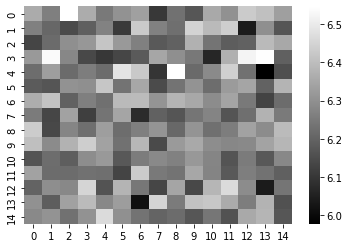

In [102]:
#first row of data
sns.heatmap(images[0], cmap='gray');
print(f'This image is for {y[0]}')

This image is for 1.0


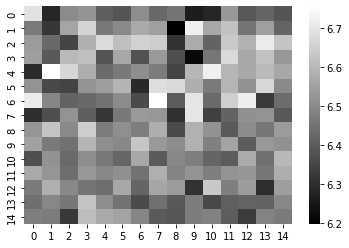

In [114]:
#nth row of data
n=112
sns.heatmap(images[n], cmap='gray');
print(f'This image is for{y[n]}')

# Artificial Neural Networks
## Basic Model

In [73]:
models = [];

In [74]:
%%time
n = 225

#Initializing ANN
ANNpred= tf.keras.models.Sequential()

#Add input layer
ANNpred.add(tf.keras.layers.Dense(units=n, activation='relu'))

#Add hidden layer
ANNpred.add(tf.keras.layers.Dense(units=(n/2), activation='relu'))

#Add output layer
ANNpred.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#Compiling ANN
ANNpred.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Training ANN
ANN_1 = ANNpred.fit(Z_train, y_train, batch_size = 100, epochs = 100, verbose=0)

models.append(('ANN_Basic', ANNpred))

Wall time: 1.22 s


In [75]:
ANNpred.evaluate(x=Z_test, y=y_test, verbose=1)

3/3 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

for ix, layer in enumerate(ANNpred.layers):
    if hasattr(ANNpred.layers[ix], 'kernel_initializer') and \
            hasattr(ANNpred.layers[ix], 'bias_initializer'):
        weight_initializer = ANNpred.layers[ix].kernel_initializer
        bias_initializer = ANNpred.layers[ix].bias_initializer

        old_weights, old_biases = ANNpred.layers[ix].get_weights()

        ANNpred.layers[ix].set_weights([
            weight_initializer(shape=old_weights.shape),
            bias_initializer(shape=old_biases.shape)])

## Basic CNN

In [116]:
mCNNBasic = tf.keras.models.Sequential()
mCNNBasic.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[15, 15, 3]))
mCNNBasic.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
mCNNBasic.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
mCNNBasic.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
mCNNBasic.add(tf.keras.layers.Flatten())
mCNNBasic.add(tf.keras.layers.Dense(units=128, activation='relu'))
mCNNBasic.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
mCNNBasic.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [130]:
np.array(x_train_img).shape
hist2 = mCNNBasic.fit(x=x_train_img, y=y_train, batch_size = 100, epochs = 10, verbose=0)

ValueError: Data cardinality is ambiguous:
  x sizes: 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15
  y sizes: 270
Make sure all arrays contain the same number of samples.

In [76]:
#reset data
#data_T = original_T.copy();
#data_NT = original_NT.copy();

from importlib import reload
reload(FG)

<module 'eegFG.EEG_feature_extraction' from 'C:\\Users\\Al\\OneDrive - The University Of British Columbia\\UBC Year 4 (Windows)\\MANU 465\\Project B\\MANU465_Team1_Project\\eegFG\\EEG_feature_extraction.py'>